# As the Castro paper is only using the cDC1, cDC2 and classical monocytes from our atlas, making a UMAP of just these cells. Ussing the scvi integrated object

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

# Using scvi object:

In [3]:
data_scvi = sc.read_h5ad('/scratch/user/s4436039/scdata/Myeloid_Objects/NRclean_scVI_Data.h5ad')

In [4]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
# subset out the cDC1, cDC2, and classical monocytes
data_DC1_2_M_scvi = data_scvi[data_scvi.obs["NR_annotations_simple"].isin(["cDC1","cDC2","Classical monocytes"])]

In [6]:
data_DC1_2_M_scvi.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
Classical monocytes    57086
cDC2                   17391
cDC1                    6730
Name: count, dtype: int64

In [7]:
#check how many PCs in scvi object:
data_DC1_2_M_scvi.obsm["X_scVI"].shape

(81207, 30)

In [8]:
# For scvi data, assign the new PCs to the standard PCA slot
data_DC1_2_M_scvi.obsm['X_pca'] = data_DC1_2_M_scvi.obsm['X_scVI']

/scratch/temp/20650103/ipykernel_2658641/4101479447.py:2: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.


In [9]:
#check how many PCs in scvi object:
data_DC1_2_M_scvi.obsm["X_pca"].shape

(81207, 30)

In [10]:
## Computing neighbourhood graph 
sc.pp.neighbors(data_DC1_2_M_scvi, n_neighbors=10, n_pcs=30, use_rep="X_scVI")

In [11]:
# umap
sc.tl.umap(data_DC1_2_M_scvi, min_dist=0.3)  

## Plotting:

In [12]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

In [12]:
custom_palette = [
    "#22577a",  # classical mono
    "#d5d5d5",  # cDC1
    "#fa3740",  # cDC2
]

In [14]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

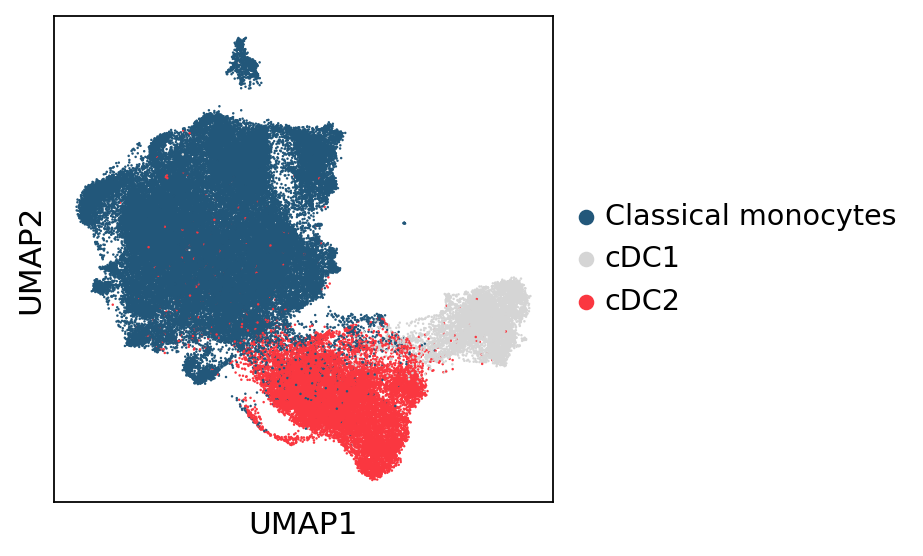

In [15]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC1_2_M_scvi, color=["NR_annotations_simple"], ncols=1, size=5, title="", palette=custom_palette, save="Nikita-Castro-DC1-DC2-Mono-v3.svg")

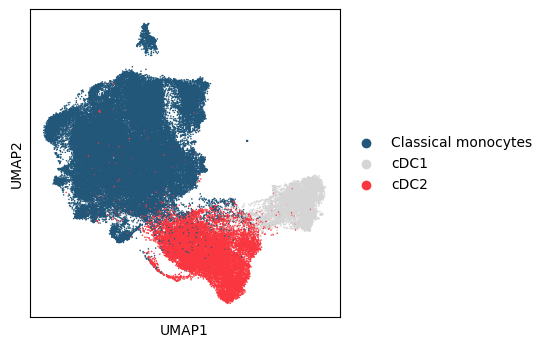

In [13]:
#plotting check
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC1_2_M_scvi, color=["NR_annotations_simple"], ncols=1, size=5, title="", palette=custom_palette)

In [16]:
#export UMAP coordinates
pd.concat(
    [
        pd.DataFrame(data_DC1_2_M_scvi.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=data_DC1_2_M_scvi.obs_names),
        data_DC1_2_M_scvi.obs[["NR_annotations_simple"]],
    ],
    axis=1,
).to_csv("umap_coordinates_Castro.csv")

## Making marker plot to go with Castro UMAP:

In [16]:
custom_order = ["cDC1", "cDC2", "Classical monocytes"]

In [17]:
markers = ["CLEC9A","CD1C","CD14"]

In [18]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

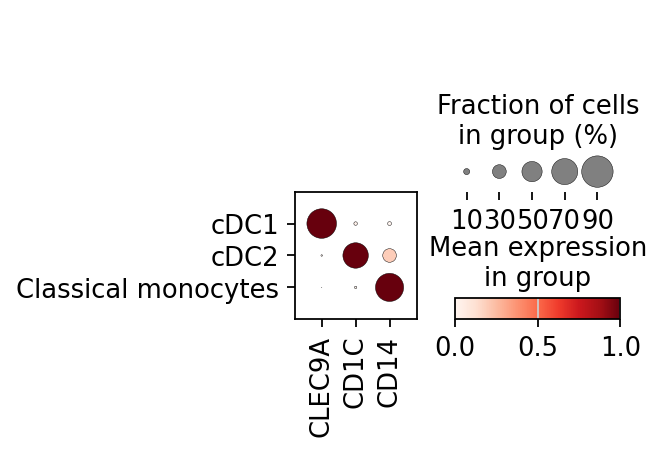

In [19]:
sc.pl.dotplot(data_DC1_2_M_scvi, markers, groupby="NR_annotations_simple", categories_order=custom_order, standard_scale="var", save="_Nikita-Castro-DC1-DC2-Mono.svg")

In [20]:
from matplotlib.colors import LinearSegmentedColormap

In [21]:
# Define gradient
custom_gradient = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#315677", "white", "#E64A49"] 
)

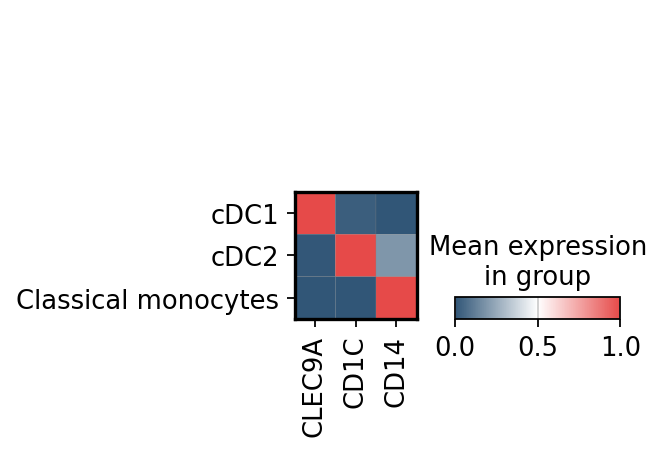

In [22]:
sc.pl.matrixplot(data_DC1_2_M_scvi, markers, groupby="NR_annotations_simple", standard_scale="var", categories_order=custom_order, cmap = custom_gradient, save="_Nikita-Castro-DC1-DC2-Mono.svg")